## Importing required libraries

In [258]:
import pandas as pd
import numpy as np
import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Gathering data from 3 sources

In [259]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [260]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as file:
        file.write(response.content)
image_predictions_df = pd.read_csv(file_name, sep = '\t')

In [ ]:
# I do not have a twitter developer account.
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [261]:
df_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})

api_df = pd.DataFrame(df_list)

## Assessing data

#### <font color='red'> Visual assessment of archive dataframe </font>

In [262]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### <font color='red'>detection of strange words that are not considered dog names  </font>

In [263]:
archive_df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Bailey         7
Buddy          7
Toby           7
an             7
Bella          6
Oscar          6
Scout          6
Stanley        6
Rusty          6
Dave           6
Jax            6
Leo            6
Milo           6
Jack           6
Koda           6
George         5
            ... 
Lupe           1
Jeb            1
Carper         1
Godi           1
Aubie          1
Sunshine       1
Orion          1
Swagger        1
Travis         1
Ralphie        1
Dudley         1
Alejandro      1
Torque         1
Odin           1
life           1
Charl          1
Horace         1
DonDon         1
Maude          1
Timber         1
Ambrose        1
Leonard        1
Beemo          1
Lilli          1
Ember          1
Tedrick        1
Goliath        1
Rudy          

#### <font color='red'> Assessment of the rating denominator to detect wrong entries  </font>

In [264]:
archive_df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

#### <font color='red'>Assessment of the columns of archive dataframe to identify their data type and how many non-null values in each column  </font>

In [265]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### <font color='red'> Visual assessment of image predictions dataframe  </font>

In [266]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


####  <font color='red'> What is the first prediction of non-dog images?  </font>

In [267]:
image_predictions_df[image_predictions_df['p1_dog'] == False].p1

6             box_turtle
8          shopping_cart
17                   hen
18      desktop_computer
21      three-toed_sloth
22                    ox
25            guinea_pig
29                  coho
33                 llama
43             seat_belt
45                 snail
50           triceratops
51                  swab
52                   hay
53                 hyena
56         jigsaw_puzzle
69                vacuum
73                 teddy
77             porcupine
78                 goose
87                  hare
93          electric_fan
94              web_site
95              web_site
96                  ibex
98           fire_engine
100             lorikeet
103              toyshop
106        jigsaw_puzzle
107        common_iguana
              ...       
1900            web_site
1902          pencil_box
1904              barrow
1905              prison
1906             barbell
1910              grille
1931            revolver
1932              Angora
1936          chimpanzee


#### <font color='red'>What is the second prediction of non-dog images? </font>

In [268]:
image_predictions_df[image_predictions_df['p2_dog'] == False].p2

6                mud_turtle
8           shopping_basket
17                     cock
18                     desk
21                    otter
25                    skunk
29               barracouta
34                chain_saw
45                     slug
48                    teddy
50                armadillo
51                chain_saw
53      African_hunting_dog
56                  doormat
69                     swab
73               bath_towel
77               bath_towel
78                    drake
82                 ice_bear
83       Christmas_stocking
87                    dhole
93                spotlight
94               dishwasher
96                  bighorn
98                tow_truck
100             hummingbird
104              bath_towel
106              prayer_rug
107          frilled_lizard
112                      ox
               ...         
1900                   menu
1902                  purse
1905             dishwasher
1906               dumbbell
1910            beac

#### <font color='red'> What is the third prediction of non-dog images? </font>

In [269]:
image_predictions_df[image_predictions_df['p3_dog'] == False].p3

6                 terrapin
7                 fur_coat
17               partridge
18                bookcase
21          great_grey_owl
25                 hamster
29                     gar
33                   dingo
34             power_drill
45                   acorn
49                   teddy
50           common_iguana
51                     wig
52           water_buffalo
53                  coyote
54               seat_belt
56            space_heater
69           toilet_tissue
73      Christmas_stocking
77                  badger
78                     hen
82                  weasel
83                ski_mask
92                   teddy
93               lampshade
94            oscilloscope
96                     ram
98                    jeep
99                ice_bear
100           African_grey
               ...        
1941                muzzle
1946          barber_chair
1950                 teddy
1953                weasel
1956                 wreck
1970               printer
1

#### <font color='red'>What is the most frequent breed in the first prediction? </font>

In [270]:
image_predictions_df.p1.mode()

0    golden_retriever
dtype: object

#### <font color='red'>What is the most frequent breed in the second prediction? </font>

In [271]:
image_predictions_df.p2.mode()

0    Labrador_retriever
dtype: object

#### <font color='red'>What is the most frequent breed in the third prediction? </font>

In [272]:
image_predictions_df.p3.mode()

0    Labrador_retriever
dtype: object

#### <font color='red'>Descriptive statistics of numeric variables in image predictions dataframe </font>

In [273]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### <font color='red'>Visual assessment of API dataframe </font>

In [274]:
api_df

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


#### <font color='red'>Descriptive statistics of numeric variables in API dataframe </font>

In [275]:
api_df.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


#### <font color='red'>Making copies of the original dataframes prior to cleaning. </font>

In [276]:
archive_clean_df = archive_df.copy()
image_predictions_clean_df = image_predictions_df.copy()
api_clean_df = api_df.copy()

## Cleaning data

### define 1

1. Remove the entries containing missing values in expanded_urls as those are tweets without photos

### code 1

In [277]:
archive_clean_df.shape

(2356, 17)

In [278]:
archive_clean_df['expanded_urls'].isnull().sum()

59

In [279]:
archive_clean_df = archive_clean_df.dropna(subset=['expanded_urls'])

### test 1

In [280]:
archive_clean_df['expanded_urls'].isnull().sum()

0

In [281]:
archive_clean_df.shape

(2297, 17)

### define 2

2. replace the string 'None' in doggo, floofer, pupper and puppo columns with ""

### code 2

In [282]:
(archive_clean_df.loc[:, 'doggo':"puppo"] != 'None') .sum()

doggo       94
floofer     10
pupper     255
puppo       29
dtype: int64

In [283]:
# Getting all the tweets where the value of both 'doggo' and 'pupper' is not none
nonunique_stage = archive_clean_df[(archive_clean_df['doggo'] != 'None') & (archive_clean_df['pupper'] != 'None')]

# Extracting only those the columns of interest and investigate its head
nonunique_stage.iloc[:, -4:].head()

,doggo,floofer,pupper,puppo
460,doggo,None,pupper,None
531,doggo,None,pupper,None
565,doggo,None,pupper,None
575,doggo,None,pupper,None
705,doggo,None,pupper,None


In [284]:
archive_clean_df.doggo = archive_clean_df.doggo.str.replace('None', '')
archive_clean_df.floofer = archive_clean_df.floofer.str.replace('None', '')
archive_clean_df.pupper = archive_clean_df.pupper.str.replace('None', '')
archive_clean_df.puppo = archive_clean_df.puppo.str.replace('None', '')

### test 2

In [285]:
archive_clean_df.doggo.value_counts()

         2203
doggo      94
Name: doggo, dtype: int64

In [286]:
archive_clean_df.floofer.value_counts()

           2287
floofer      10
Name: floofer, dtype: int64

In [287]:
archive_clean_df.pupper.value_counts()

          2042
pupper     255
Name: pupper, dtype: int64

In [288]:
archive_clean_df.puppo.value_counts()

         2268
puppo      29
Name: puppo, dtype: int64

### define 3

3. combine the 4 columns of doggo, floofer, pupper and puppo into one column called 'dog_stage' and remove the old columns

### Code 3

In [289]:
archive_clean_df['dog_stage'] = archive_clean_df.doggo + archive_clean_df.floofer + archive_clean_df.pupper + archive_clean_df.puppo
archive_clean_df = archive_clean_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

### Test 3

In [290]:
archive_clean_df.dog_stage.value_counts()

                1923
pupper           243
doggo             80
puppo             28
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [291]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
dog_stage                     2297 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 269.2+ KB


### define 4

4. replace "" in dog_stage with NaN

### Code 4

In [292]:
archive_clean_df.dog_stage = archive_clean_df.dog_stage.replace('', np.nan)

### Test 4

In [293]:
archive_clean_df.dog_stage.value_counts()

pupper          243
doggo            80
puppo            28
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [294]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
dog_stage                     374 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 269.2+ KB


### define 5

5. add hyphen to 'doggopupper', 'doggofloofer' and 'doggopuppo'

### Code 5

In [295]:
archive_clean_df.dog_stage = archive_clean_df.dog_stage.str.replace('doggopupper', 'doggo-pupper')
archive_clean_df.dog_stage = archive_clean_df.dog_stage.str.replace('doggofloofer', 'doggo-floofer')
archive_clean_df.dog_stage = archive_clean_df.dog_stage.str.replace('doggopuppo', 'doggo-puppo')

### Test 5

In [296]:
archive_clean_df.dog_stage.value_counts()

pupper           243
doggo             80
puppo             28
doggo-pupper      12
floofer            9
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

### define 6

6. address the tidiness issues of image predictions dataframe as Column headers are values, not variable names

### Code 6

In [297]:
# rename columns to be suitable for the pd.wide_to long function
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_predictions_clean_df.columns = cols
image_predictions_clean_df.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [298]:
image_predictions_clean_df = pd.wide_to_long(image_predictions_clean_df, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

### Test 6

In [299]:
image_predictions_clean_df

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,bloodhound,0.116197,True
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True


### Define 7

7. select and remove tweets without photos in the archive dataframe

### Code 7

In [300]:
tweets_with_image = list(image_predictions_clean_df.tweet_id.unique())

len(tweets_with_image) 

2075

In [301]:
len(tweets_with_image) == archive_clean_df.tweet_id.isin(tweets_with_image).sum()

True

In [302]:
archive_clean_df = archive_clean_df[archive_clean_df.tweet_id.isin(tweets_with_image)]

### Test 7

In [303]:
archive_clean_df.shape[0]

2075

### Define 8

8. Drop the retweets and replies from the archive data set & remove their corresponding columns

### Code 8

In [304]:
retweets = archive_clean_df.retweeted_status_id.notnull()
archive_clean_df[retweets].shape[0]

81

In [305]:
archive_clean_df = archive_clean_df[~retweets]

In [306]:
replies = archive_clean_df.in_reply_to_status_id.notnull()
archive_clean_df[replies].shape[0]

23

In [307]:
archive_clean_df = archive_clean_df[~replies]

In [308]:
archive_clean_df = archive_clean_df.drop(['in_reply_to_status_id','in_reply_to_user_id', 
                                         'retweeted_status_id', 'retweeted_status_user_id', 
                                         'retweeted_status_timestamp'], axis = 1)

### Test 8

In [309]:
archive_clean_df.shape

(1971, 9)

In [310]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             303 non-null object
dtypes: int64(3), object(6)
memory usage: 154.0+ KB


### Define 9

9. Drop the retweets and replies ids from the image prediction dataframe

### Code 9

In [311]:
sum(np.logical_not(image_predictions_clean_df.tweet_id.isin(list(archive_clean_df.tweet_id))))

312

In [312]:
image_predictions_clean_df = image_predictions_clean_df[~np.logical_not(image_predictions_clean_df.tweet_id.isin(list(archive_clean_df.tweet_id)))]

### Test 9

In [313]:
image_predictions_clean_df.shape[0]

5913

In [314]:
image_predictions_clean_df.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


### Define 10

 10. remove invalid names ('a' & 'an') from the column 'name' in archive dataframe, then replace 'None' with 'Nan'

### Code 10

In [315]:
archive_clean_df.name.value_counts(dropna = False)

None              524
a                  55
Charlie            11
Oliver             10
Lucy               10
Cooper             10
Tucker              9
Penny               9
Winston             8
Sadie               8
Daisy               7
Toby                7
Lola                7
the                 7
Bella               6
Koda                6
Stanley             6
Jax                 6
Bo                  6
an                  6
Bailey              5
Rusty               5
Dave                5
Louis               5
Milo                5
Buddy               5
Leo                 5
Scout               5
Chester             5
Oscar               5
                 ... 
Lillie              1
Ed                  1
Rupert              1
Jay                 1
Arya                1
Bayley              1
Rolf                1
Pancake             1
Davey               1
Jaycob              1
Aubie               1
Ralpher             1
Mason               1
Ginger              1
Lupe      

In [197]:
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_clean_df.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern, row['text'])[0]
            archive_clean_df.loc[index,'name'] = archive_clean_df.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern, row['text'])[0]
            archive_clean_df.loc[index,'name'] = archive_clean_df.loc[index,'name'].replace('an', c_name)
    except IndexError:
        archive_clean_df.loc[index,'name'] = np.nan

In [316]:
archive_clean_df.name = archive_clean_df.name.replace('None', np.nan)

### Test 10

In [317]:
archive_clean_df.name.value_counts(dropna = False)

NaN         524
a            55
Charlie      11
Oliver       10
Lucy         10
Cooper       10
Tucker        9
Penny         9
Sadie         8
Winston       8
Lola          7
Daisy         7
the           7
Toby          7
an            6
Stanley       6
Bella         6
Jax           6
Bo            6
Koda          6
Buddy         5
Rusty         5
Bailey        5
Leo           5
Scout         5
Chester       5
Oscar         5
Dave          5
Milo          5
Louis         5
           ... 
Leonard       1
Beemo         1
Crimson       1
Tedrick       1
Goliath       1
Geoff         1
Chuq          1
Obi           1
Jed           1
Cal           1
Sobe          1
Philippe      1
Gert          1
Monkey        1
Jim           1
Tupawc        1
Monster       1
Philbert      1
Lance         1
Lorelei       1
Meera         1
Simba         1
Maisey        1
Marq          1
Ronnie        1
Stephan       1
Trip          1
Theo          1
Willow        1
Gilbert       1
Name: name, Length: 935,

### Define 11

11. divide the numerator by the dogs count for the rows whose rating_numerator is greater than or equal to 40

### Code 11

In [318]:
archive_clean_df.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [319]:
dogs_count = archive_clean_df.rating_denominator[archive_clean_df.rating_numerator >= 40 ]/10
print(dogs_count)

433      7.0
695      1.0
902     15.0
979      1.0
1120    17.0
1202     5.0
1228     9.0
1254     8.0
1274     5.0
1351     5.0
1433     4.0
1635    11.0
1779    12.0
1843     8.0
2074     1.0
Name: rating_denominator, dtype: float64


In [320]:
archive_clean_df.loc[archive_clean_df.rating_numerator >= 40, ['rating_numerator', 'rating_denominator']] = [archive_clean_df.rating_numerator[archive_clean_df.rating_numerator >= 40]/dogs_count , 10]

In [321]:
archive_clean_df[archive_clean_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

archive_clean_df['rating_numerator']= archive_clean_df['rating_numerator'].astype(float)
archive_clean_df[archive_clean_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']].replace(archive_clean_df.rating_numerator, archive_clean_df.text.str.contains(r"(\d+\.\d*\/\d+)"), regex=True, inplace=True)

In [322]:
archive_clean_df[archive_clean_df.rating_numerator >40  ]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,Logan,NaN
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN
2074,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,NaN,NaN


In [323]:
archive_clean_df.text[archive_clean_df.rating_numerator >40  ][695]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [324]:
archive_clean_df.text[archive_clean_df.rating_numerator >40  ][979]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [325]:
archive_clean_df.text[archive_clean_df.rating_numerator >40  ][2074]

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

### Test 11

In [326]:
archive_clean_df.rating_denominator[archive_clean_df.rating_numerator >= 40 ]/10

695     1.0
979     1.0
2074    1.0
Name: rating_denominator, dtype: float64

### Define 12

12. for the rows whose denominator is less than or greater than 10, replace their numerator and the denominator with the correct values from the tweet text

### Code 12

In [327]:
archive_clean_df.text[archive_clean_df.rating_denominator != 10 ]

516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
1068    After so many requests, this is Bretagne. She ...
1165    Happy 4/20 from the squad! 13/10 for all https...
1662    This is Darrel. He just robbed a 7/11 and is i...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object

In [328]:
archive_clean_df.text[archive_clean_df.rating_denominator != 10 ][516]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [329]:
archive_clean_df.text[archive_clean_df.rating_denominator != 10 ][2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [330]:
archive_clean_df.tweet_id[archive_clean_df.rating_denominator != 10 ][2335]

666287406224695296

In [331]:
archive_clean_df.rating_numerator[archive_clean_df.tweet_id == 666287406224695296] , archive_clean_df.rating_denominator[archive_clean_df.tweet_id == 666287406224695296] = [9, 10]

In [332]:
archive_clean_df.text[archive_clean_df.rating_denominator != 10 ][1068]

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [333]:
archive_clean_df.tweet_id[archive_clean_df.rating_denominator != 10 ][1068]

740373189193256964

In [334]:
archive_clean_df.rating_numerator[archive_clean_df.tweet_id == 740373189193256964] , archive_clean_df.rating_denominator[archive_clean_df.tweet_id == 740373189193256964] = [14, 10]

In [335]:
archive_clean_df.text[archive_clean_df.rating_denominator != 10 ][1165]

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [336]:
archive_clean_df.tweet_id[archive_clean_df.rating_denominator != 10 ][1165]

722974582966214656

In [337]:
archive_clean_df.rating_numerator[archive_clean_df.tweet_id == 722974582966214656] , archive_clean_df.rating_denominator[archive_clean_df.tweet_id == 722974582966214656] = [13, 10]

In [338]:
archive_clean_df.text[archive_clean_df.rating_denominator != 10 ][1662]

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [339]:
archive_clean_df.tweet_id[archive_clean_df.rating_denominator != 10 ][1662]

682962037429899265

In [340]:
archive_clean_df.rating_numerator[archive_clean_df.tweet_id == 682962037429899265] , archive_clean_df.rating_denominator[archive_clean_df.tweet_id == 682962037429899265] = [10, 10]

### Test 12

In [341]:
archive_clean_df.text[archive_clean_df.rating_denominator != 10 ]

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object

In [342]:
archive_clean_df[archive_clean_df.tweet_id == 682962037429899265] 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1662,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10.0,10,Darrel,NaN


In [343]:
archive_clean_df[archive_clean_df.tweet_id == 722974582966214656] 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13.0,10,NaN,NaN


In [344]:
archive_clean_df[archive_clean_df.tweet_id == 740373189193256964] 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14.0,10,NaN,NaN


In [345]:
archive_clean_df[archive_clean_df.tweet_id == 666287406224695296] 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2335,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.0,10,an,NaN


### Define 13

13. merge the archive dataframe with the API dataframe based on the tweet ID

### Code 13

In [346]:
archive_clean_df.shape[0]

1971

In [347]:
api_clean_df.shape[0]

2354

In [348]:
image_predictions_clean_df.shape[0]/3

1971.0

In [349]:
archive_api_clean_df = pd.merge(archive_clean_df, api_clean_df, on='tweet_id', how='outer')

In [350]:
archive_api_clean_df = archive_api_clean_df.drop(archive_api_clean_df.index[1971:])

### Test 13

In [351]:
archive_api_clean_df.shape

(1971, 11)

In [352]:
archive_api_clean_df.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
1966,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN,111,41
1967,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,NaN,311,147
1968,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,NaN,128,47
1969,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,NaN,132,48
1970,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,NaN,NaN,2535,532


In [353]:
archive_api_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1447 non-null object
dog_stage             303 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 184.8+ KB


### Define 14 

14. convert the type of the tweet_id column from integer into string

### Code 14

In [354]:
archive_api_clean_df.tweet_id = archive_api_clean_df.tweet_id.astype(str)

In [355]:
image_predictions_clean_df.tweet_id = image_predictions_clean_df.tweet_id.astype(str)

### Test 14

In [356]:
archive_api_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1447 non-null object
dog_stage             303 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 184.8+ KB


In [357]:
image_predictions_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            5913 non-null object
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_level    5913 non-null int64
prediction          5913 non-null object
confidence          5913 non-null float64
breed               5913 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 329.1+ KB


### Define 15

15. convert the type of the timestamp column from string into datetime

### Code 15

In [358]:
archive_api_clean_df.timestamp = pd.to_datetime(archive_api_clean_df.timestamp)

### Test 15

In [359]:
archive_api_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1447 non-null object
dog_stage             303 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 184.8+ KB


### Define 16

16. change the type of img_num and prediction_level columns to string

### Code 16

In [360]:
image_predictions_clean_df.img_num = image_predictions_clean_df.img_num.astype(str)

In [361]:
image_predictions_clean_df.prediction_level = image_predictions_clean_df.prediction_level.astype(str)

### Test 16

In [362]:
image_predictions_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            5913 non-null object
jpg_url             5913 non-null object
img_num             5913 non-null object
prediction_level    5913 non-null object
prediction          5913 non-null object
confidence          5913 non-null float64
breed               5913 non-null bool
dtypes: bool(1), float64(1), object(5)
memory usage: 329.1+ KB


## Merging into single dataframe & storing data in a csv file

In [363]:
twitter_archive_master_df = archive_api_clean_df.merge(image_predictions_clean_df[image_predictions_clean_df['prediction_level'] == '1'], on = 'tweet_id', how = 'left')

In [364]:
twitter_archive_master_df.shape

(1971, 17)

In [365]:
twitter_archive_master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,basset,0.555712,True


In [366]:
twitter_archive_master_df.to_csv('twitter_archive_master.csv', index= False)

## Analyzing & visualizing data

#### <font color='red'>Favorites & retweets count over time </font>

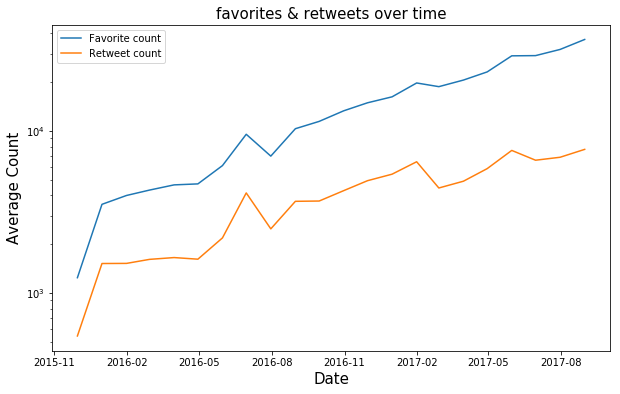

In [367]:
time = archive_api_clean_df.iloc[:,[0,1,5,9,10]]
time = time.set_index('timestamp')
plt.figure (figsize= (10,6))
plt.plot(time.groupby(pd.Grouper(freq='M'))['favorite_count'].mean(), label = 'Favorite count')
plt.plot(time.groupby(pd.Grouper(freq='M'))['retweet_count'].mean(), label = 'Retweet count')
plt.yscale('log')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Average Count', fontsize = 15)
plt.title('favorites & retweets over time', fontsize = 15)
plt.legend()
plt.show()

#### <font color='red'> Relationship between favorites count & retweets count </font>

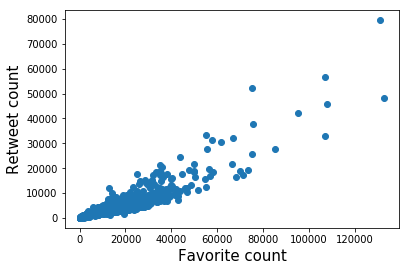

In [368]:
plt.scatter(archive_api_clean_df.favorite_count, archive_api_clean_df.retweet_count)
plt.xlabel('Favorite count', fontsize = 15)
plt.ylabel('Retweet count', fontsize = 15)
plt.show()

#### <font color='red'>Tweets monthly count over time </font>

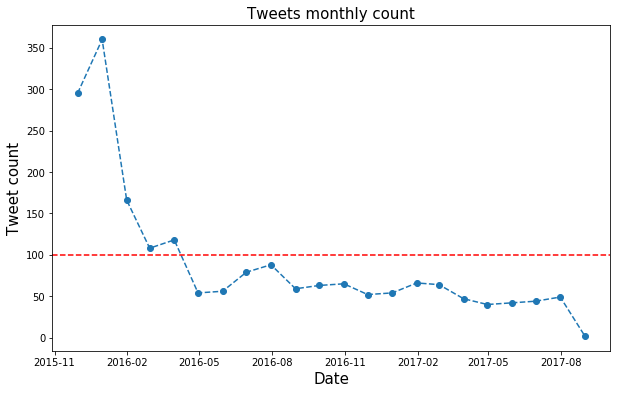

In [369]:
plt.figure (figsize= (10,6))
plt.plot(time.groupby(pd.Grouper(freq='M'))['tweet_id'].count(), marker = 'o', linestyle = '--')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Tweet count', fontsize = 15)
plt.title('Tweets monthly count', fontsize = 15)
plt.axhline(y=100, linestyle = '--', color = 'red')
plt.show()

#### <font color='red'>Average rating over time </font>

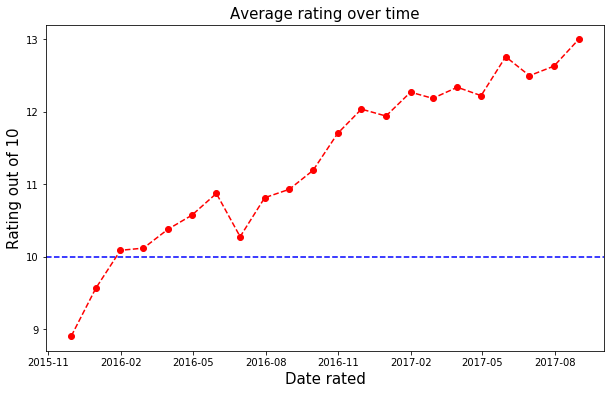

In [370]:
time_2 = time[time['rating_numerator']<=20]
plt.figure (figsize= (10,6))
plt.plot(time_2.groupby(pd.Grouper(freq='M'))['rating_numerator'].mean(), marker = 'o', linestyle = '--', color = 'red')
plt.xlabel('Date rated', fontsize = 15)
plt.ylabel('Rating out of 10', fontsize = 15)
plt.title('Average rating over time', fontsize = 15)
plt.axhline(y=10, linestyle = '--', color = 'blue')
plt.show()

#### <font color='red'>Distribution of dog stage among pupper, doggo, puppo and mixed stages </font>

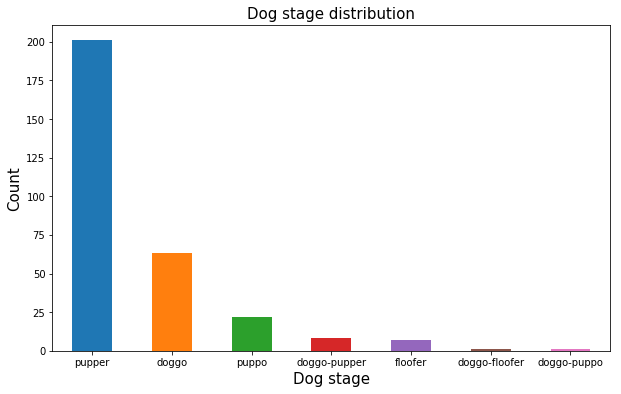

In [371]:
plt.figure (figsize= (10,6))
archive_api_clean_df.dog_stage.value_counts().plot(kind = 'bar')
plt.xlabel('Dog stage', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 0)
plt.title('Dog stage distribution', fontsize = 15)
plt.show()

#### <font color='red'>Tweets count for the top breeds </font>

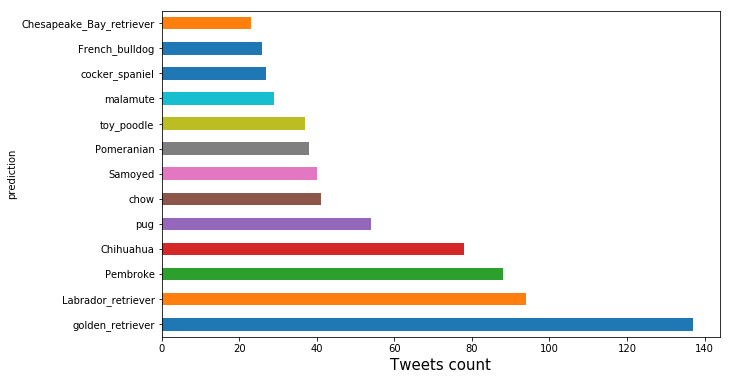

In [372]:
merged = archive_api_clean_df.merge(image_predictions_clean_df[image_predictions_clean_df['prediction_level'] == '1'], on = 'tweet_id', how= 'left')
plt.figure (figsize= (10,6))
merged.groupby('prediction')['tweet_id'].count().sort_values(ascending = False).head(13).plot(kind = 'barh')
plt.xlabel('Tweets count', fontsize = 15)
plt.show()

#### <font color='red'>Favorites count for the top breeds </font>

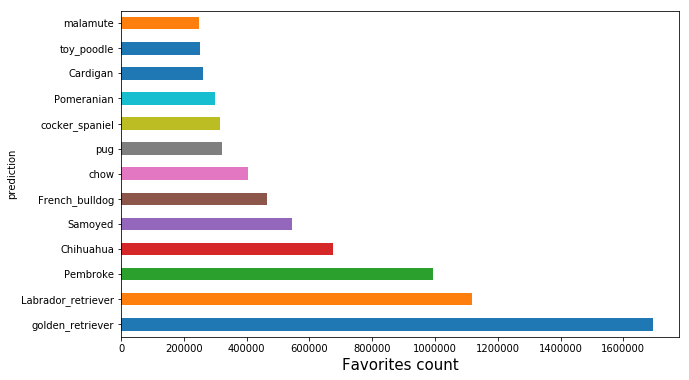

In [373]:
plt.figure (figsize= (10,6))
merged.groupby('prediction')['favorite_count'].sum().sort_values(ascending = False).head(13).plot(kind = 'barh')
plt.xlabel('Favorites count', fontsize = 15)
plt.show()

#### <font color='red'>retweets count for the top breeds </font>

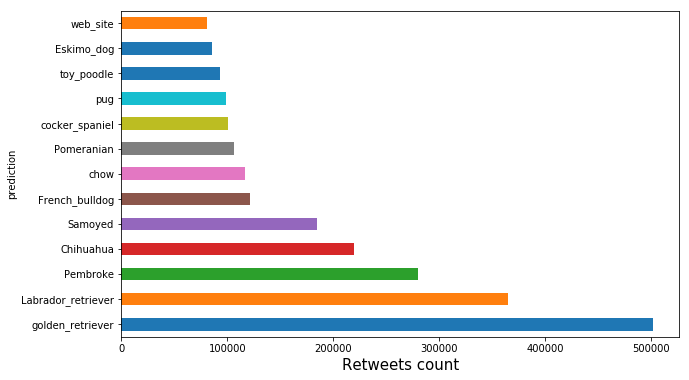

In [374]:
plt.figure (figsize= (10,6))
merged.groupby('prediction')['retweet_count'].sum().sort_values(ascending = False).head(13).plot(kind = 'barh')
plt.xlabel('Retweets count', fontsize = 15)
plt.show()